In [1]:
import pandas as pd 
import numpy as np
import string
import os

#Data Visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns

#ML
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

In [2]:
#Mount google drive 
from google.colab import drive
drive.mount('/content/drive')

#directory path where the age data set is stored --TO MODIFY
dir_path = '/content/drive/MyDrive/Summer 22/Data Mining/Project/'
#file name --TO MODIFY
file_name = 'AgeDataset.csv'
os.listdir(dir_path)
df = pd.read_csv(dir_path + file_name)

Mounted at /content/drive


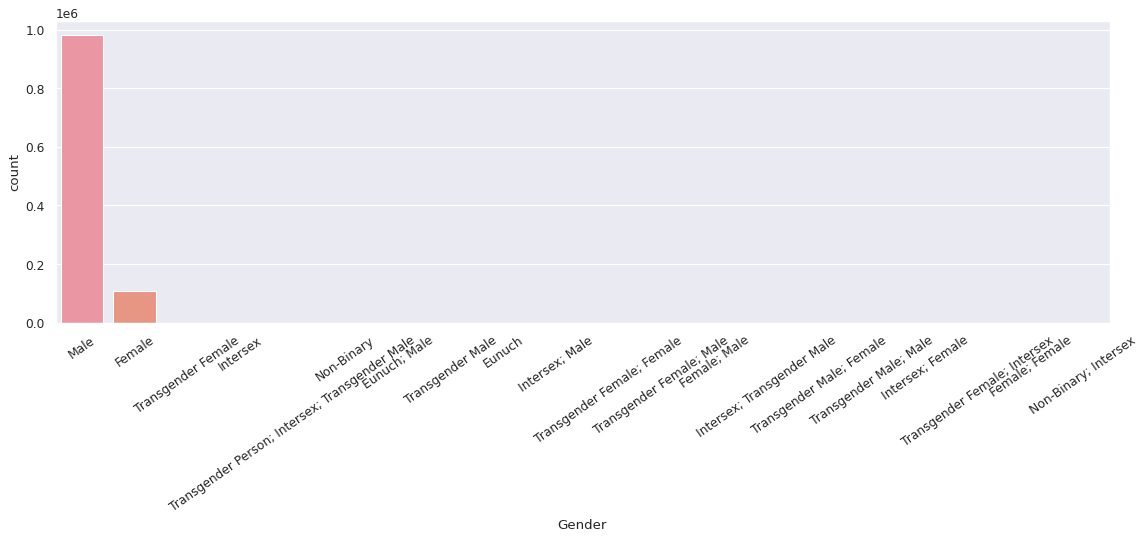

In [3]:
figure(figsize=(17, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender", data=df)

In [4]:
plot_gender = df
print(df.shape)
print(len(df))
plot_gender['Gender'].dropna(inplace=True)
print(len(plot_gender))
plot_gender.head
plot_gender.shape



(1223009, 10)
1223009
1223009


(1223009, 10)

In [5]:
plot_gender['Gender '] = 'Other'
plot_gender['Gender '] = plot_gender.apply(lambda x: x['Gender'] if x['Gender']=='Male' else x['Gender '], axis=1)
plot_gender['Gender '] = plot_gender.apply(lambda x: x['Gender'] if x['Gender']=='Female' else x['Gender '], axis=1)
#plot_gender['Gender_updated'] = plot_gender.apply(lambda x: 'Other' if x['Gender_updated']==np.nan else x['Gender_updated'], axis=1)



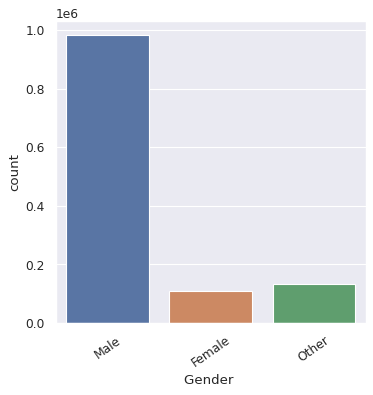

In [6]:

figure(figsize=(5, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender ", data=plot_gender)

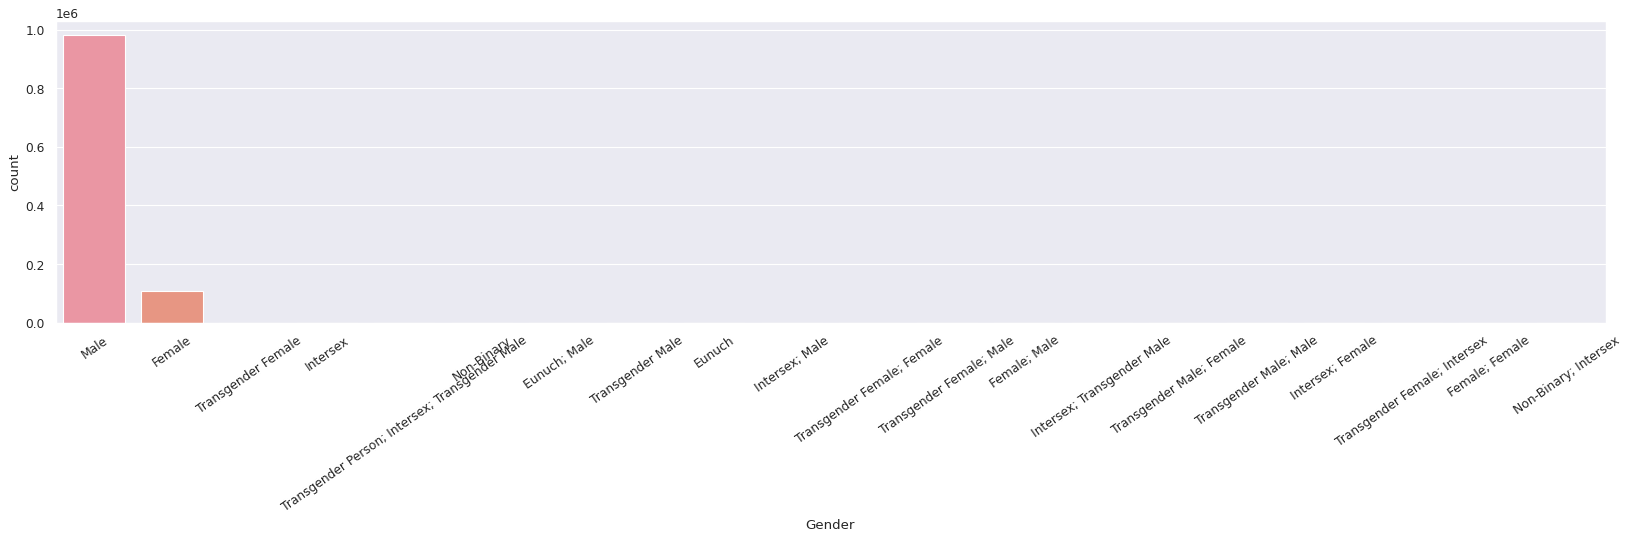

In [7]:
figure(figsize=(25, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender", data=plot_gender)

In [8]:
plot_gender['Gender'].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

**Location**

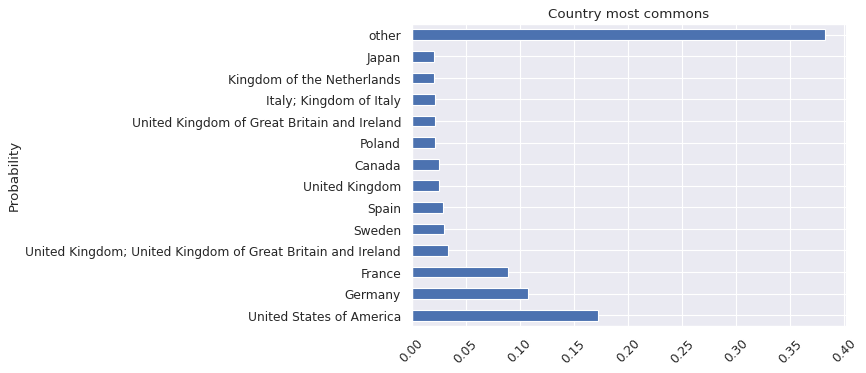

In [9]:
# Setting the color for the graph bars 
colours=['tomato', 'orangered', 'darkorange', 'orange','gold','lemonchiffon','limegreen', 'green','seagreen','lightseagreen',
        'darkturquoise','deepskyblue','dodgerblue','royalblue', 'darkblue','mediumpurple','darkorchid','fuchsia']
figure(figsize=(7, 5), dpi=80)
prob = df.Country.value_counts(normalize=True)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='barh')#,color=colours)
plt.title('Country most commons')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

Occupation

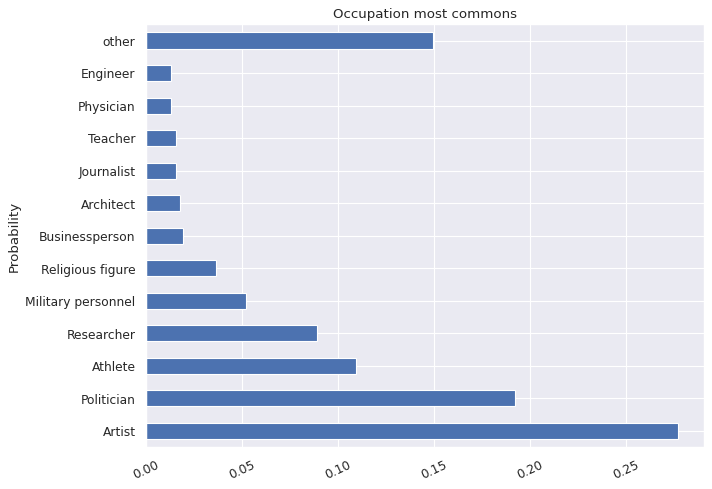

In [10]:
figure(figsize=(9, 7), dpi=80)
prob = df.Occupation.value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='barh')#,color=colours)
plt.title('Occupation most commons')
plt.ylabel("Probability")
plt.xticks(rotation=25)
plt.show()

In [11]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Gender
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,Male
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,Male
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,Male
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,Male
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,Male



Death in the Workplace

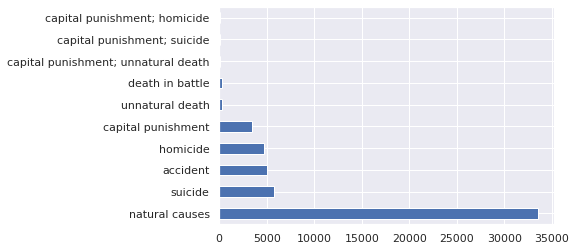

In [12]:
#Finding top 10 causes ofr the death
#.plot(kind='barh') : to plot the bar graph horizontaly
df['Manner of death'].value_counts()[:10].plot(kind='barh')


In [13]:
df['Top_Occupation']=np.nan
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Politician' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Artist' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Athlete' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Researcher' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Military personnel' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Religious figure' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Businessperson' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Teacher' else x['Top_Occupation'], axis=1)

#creating a new column for occupation
df['Top_GD']=np.nan

Keeping all frequent types of deaths except Natural Death 
populating th top_GD colum with top occupations or NAN

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

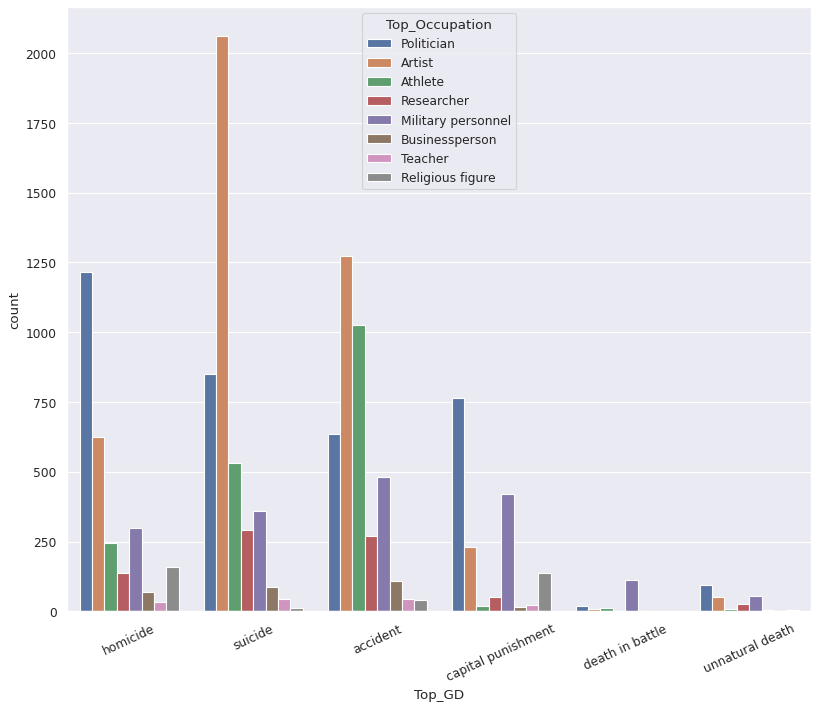

In [14]:
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='homicide' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='suicide' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='accident' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='capital punishment' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='death in battle' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='unnatural death' else x['Top_GD'], axis=1)


figure(figsize=(12, 10), dpi=80)
sns.countplot(x ='Top_GD', hue ="Top_Occupation", data = df)
plt.xticks(rotation=25)

In [15]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Gender,Top_Occupation,Top_GD
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,Male,Politician,NaN
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,Male,Artist,NaN
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,Male,Politician,homicide
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,Male,Artist,NaN
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,Male,Artist,NaN


The average life of people based on the centuries

In [16]:
#creating a subset of datapoins having cause of death as "natural cause"
df_natural_causes= df[df['Manner of death']=='natural causes']
#idx = df.index[df['Birth year']<1700]
#df = df.drop(index=idx)
idx = df_natural_causes.index[df_natural_causes['Death year'] < 1800] 
df_natural_causes = df_natural_causes.drop(index=idx)
df_2=df_natural_causes.groupby(['Death year']).mean()
print(df_2)


             Birth year  Age of death
Death year                           
1800.0      1761.857143     38.142857
1801.0      1757.200000     43.800000
1802.0      1763.133333     38.866667
1803.0      1749.500000     53.500000
1804.0      1762.333333     41.666667
...                 ...           ...
2016.0      1946.256473     69.743527
2017.0      1945.701220     71.298780
2018.0      1946.605769     71.394231
2019.0      1946.806967     72.193033
2020.0      1930.000000     90.000000

[221 rows x 2 columns]


In [17]:
df_natural_causes=pd.merge(df_natural_causes,df_2,how='left', on='Death year')
#idx = df.index[df['Birth year']<1700]
#dividing the table into 8 categoried based on year of death
df_natural_causes['Death_year_bins']=pd.cut(df_natural_causes['Death year'], 8)

Text(0.5, 1.0, 'Age of natural death based on the centuries')

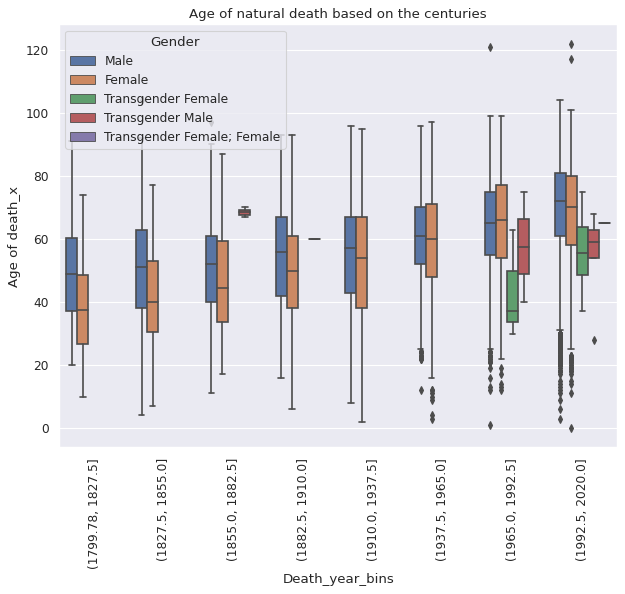

In [18]:

df_natural_causes=df_natural_causes.rename(columns={"Age of death_y": "Age of death_average"})
df_natural_causes=df_natural_causes.drop('Birth year_y', axis=1)

figure(figsize=(9, 7), dpi=80)
sns.boxplot(x='Death_year_bins', y="Age of death_x",hue="Gender", data=df_natural_causes)
plt.xticks(rotation=90)
plt.title("Age of natural death based on the centuries")

Machine Learning

In [19]:
print(df.isna().sum())


Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
Gender                     0
Top_Occupation        419236
Top_GD               1203486
dtype: int64


In [20]:
df.isna().sum()

#delete the features not useful for machine learning.
df=df.drop(['Death year','Name','Short description','Top_Occupation','Top_GD'],axis=1)

In [21]:
print(len(df))
df.head()

1223009


,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
3,Q254,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,NaN,35.0,Male
4,Q255,Male,Holy Roman Empire; Austrian Empire,Artist,1770,NaN,57.0,Male


In [22]:
#remove all rows with null value
df=df.dropna()
#New database size
print(len(df))
df.head()

45865


,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
5,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,42.0,Male
7,Q296,Male,France,Artist,1840,natural causes,86.0,Male


In [23]:
#I move our Y to the first column
cols = list(df)
#pandas pop method can take input of a column from a data frame and pop that directly
cols.insert(0, cols.pop(cols.index('Age of death')))
df.head()


,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
5,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,42.0,Male
7,Q296,Male,France,Artist,1840,natural causes,86.0,Male


In [24]:
df = df.loc[:, cols]
df.head()

,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,Male
1,49.0,Q42,Male,United Kingdom,Artist,1952,natural causes,Male
2,56.0,Q91,Male,United States of America,Politician,1809,homicide,Male
5,42.0,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,Male
7,86.0,Q296,Male,France,Artist,1840,natural causes,Male


In [25]:
print(cols)

['Age of death', 'Id', 'Gender', 'Country', 'Occupation', 'Birth year', 'Manner of death', 'Gender ']


In [26]:
#Encode nominal column
encoder = preprocessing.LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Country'] = encoder.fit_transform(df['Country'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Manner of death'] = encoder.fit_transform(df['Manner of death'])

In [27]:
df.head()

,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,4,1448,1100,1732,114,Male
1,49.0,Q42,4,1315,83,1952,114,Male
2,56.0,Q91,4,1371,1100,1809,81,Male
5,42.0,Q260,4,661,468,1790,114,Male
7,86.0,Q296,4,336,83,1840,114,Male


In [28]:
#Compute pairwise correlation of columns, excluding NA/null values.
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Age of death,Gender,Country,Occupation,Birth year,Manner of death
Age of death,1.00,-0.00,0.13,-0.02,0.08,0.25
Gender,-0.00,1.00,-0.03,0.10,-0.04,-0.06
Country,0.13,-0.03,1.00,-0.09,0.09,0.06
Occupation,-0.02,0.10,-0.09,1.00,-0.16,-0.10
Birth year,0.08,-0.04,0.09,-0.16,1.00,0.11
Manner of death,0.25,-0.06,0.06,-0.10,0.11,1.00


Standardization

The features are not in the same scale, we have to standardize the variables in the X dataset.

In [29]:
df.head()


,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,4,1448,1100,1732,114,Male
1,49.0,Q42,4,1315,83,1952,114,Male
2,56.0,Q91,4,1371,1100,1809,81,Male
5,42.0,Q260,4,661,468,1790,114,Male
7,86.0,Q296,4,336,83,1840,114,Male


In [ ]:
df = df.drop(['Id'],axis=1)
#df=df.drop(['Gender'])
#considering Age of death as column Y and rest of the columns as X
X = df[df.columns[1:5]]

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
#where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.


ss = preprocessing.StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [ ]:
y = df['Age of death']

In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

In [ ]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

Models

In [ ]:
lr= linear_model.LinearRegression()
cv= cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:15]
y = diabetes.target[:15]

lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

In [ ]:
knn= KNeighborsRegressor(n_neighbors=4)
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
cv= cross_val_score(knn,X_train,y_train,cv=2)
print(cv)
print(cv.mean())

In [ ]:
tree=DecisionTreeRegressor(random_state=1)
cv= cross_val_score(tree,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [40]:
rf=RandomForestRegressor(random_state=1)
cv= cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.29543395 0.27925439 0.29627805 0.28662309 0.29002727]
0.28952335136686025


In [41]:
#VotingRegressor
voting_rg=VotingRegressor(estimators=[('knn',knn),('rf',rf)])
cv= cross_val_score(voting_rg,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.3041984  0.2833211  0.29929679 0.2920331  0.29861541]
0.29549295898586836


Predictions
Take just better 3 (KNN, Random Forest and VotingRegressor)we do the predictions.

In [42]:
#KNN
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)

In [43]:
print("KNN results:")
print("R^2",metrics.r2_score(y_test,y_knn))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_knn))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_knn))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_knn)))

KNN results:
R^2 0.21140064748746257
Mean Absolute Error 12.477173628673585
Mean Squared Error 261.5259603645243
Root Mean Squared Error 68395.82794458672


In [44]:
#Random Forest
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)

In [45]:
print("Random Forest results:")
print("R^2",metrics.r2_score(y_test,y_rf))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_rf))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_rf))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_rf)))

Random Forest results:
R^2 0.2678807959701347
Mean Absolute Error 11.966654856314907
Mean Squared Error 242.79525125805577
Root Mean Squared Error 58949.534033462434


In [46]:
#VotingRegressor
voting_rg.fit(X_train,y_train)
y_voting_rg=voting_rg.predict(X_test)

In [47]:
print("Voting Regressor results:")
print("R^2",metrics.r2_score(y_test,y_voting_rg))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_voting_rg))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_voting_rg))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_voting_rg)))

Voting Regressor results:
R^2 0.2779926197021464
Mean Absolute Error 11.955955774000643
Mean Squared Error 239.44183180098221
Root Mean Squared Error 57332.39081620986


Results
Create a new database to compare the death years and the predictions made.

In [49]:
first_df=pd.read_csv('../input/agedataset/AgeDataset_pulito.csv')
#first_df=pd.read_csv(dir_path + file_name)

FileNotFoundError: ignored

In [ ]:
df['pred_voting']=voting_rg.predict(X)
df['pred_rf']=rf.predict(X)
df['Name']= first_df['Name']
df=df.round(0)
df=df.drop(['Gender','Country','Occupation','Birth year','General death'], axis=1)
df['voting_gap']=df['Age of death']-df['pred_voting']
df['rf_gap']=df['Age of death']-df['pred_rf']

In [ ]:
df